In [ ]:
#MOUAD RIALI


In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [19]:

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [20]:
#W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
X_train.shape

(784, 41000)

# **> Let's build our Flex NN :**

In [22]:
def one(Y):
    one_Y = np.zeros((Y.size, int(Y.max()) + 1))
    one_Y[np.arange(Y.size), Y] = 1
    one_Y = one_Y.T
    return one_Y
def tanH(x):
    return np.tanh(x)
def deriv_tanH(x):
    return 1-np.tanh(x)**2
        
def softmax(Z):
    return (np.exp(Z) / sum(np.exp(Z)))
def softmax_grad(softmax):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    s = softmax.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

In [23]:
    
class Layer :
    def _init_(self,size):
        self.size = size 
    def _initWeights_(self, parBef, parAct):
        self.weights = np.random.rand(parAct, parBef) - 0.5
        self.biais = np.random.rand(parAct, 1) - 0.5
    def updateNodes(self,A):
        self.A = A
        #print("The new Values of nodes are : ",A.shape)
    def updateWeights(self,W,b):
        self.weights = W
        self.biais = b

In [25]:
class NeuralNetwork:
    Layers = []
    Z, dZ, dW, dB=[],[],[],[]
    def _init_(self, L):
        self.cL = len(L)
        #self.m ,self.n = data.shape
        
    def add_Layer(self,layer):
        self.Layers.append(layer)
        print("Layer ",len(self.Layers)," is added.\nit has :",layer.size," nodes")    
    def forward_prop(self,X):
        self.Layers[0].updateNodes(X)
        #self.Z.append(X)
        for i in range(1,len(self.Layers)-1):  
            layer = self.Layers[i-1]
            Zi=layer.weights.dot(layer.A)+layer.biais
            #print(Zi)
            self.Z.append(Zi)
            A = tanH(Zi)
            self.Layers[i].updateNodes(A)
        Y = self.Layers[-2].weights.dot(self.Layers[-2].A)+self.Layers[-2].biais
        self.Z.append(Y)
        A = softmax(Y)
        #print(A)
        self.Layers[-1].updateNodes(A)
        return A
    def BackPropLastLayer(self,Y, m):
        dZ = self.Layers[-1].A - one(Y)
        dW = 1/m * dZ.dot(self.Layers[-2].A.T)
        db = 1/m * np.sum(dZ)
        return dZ,dW,db
    def BackpropHiddenLayers(self,dZA,Z,A,Theta,m):
        dZ = Theta.T.dot(dZA) * deriv_tanH(Z)
        dW = 1/m * dZ.dot(A.T)
        #print("dZ :",dZ.shape)
        db = 1/m * np.sum(dZ)
        return dZ,dW, db
    def get_predictions(self):
        return np.argmax(self.Layers[-1].A, 0)
    def get_accuracy(self, Y):
        print(self.get_predictions(), Y)
        return np.sum(self.get_predictions() == Y) / Y.size
    def gradient_descent(self, X, Y, iter, alpha,m):
        for i in range(iter):
            self.Z,self.dZ, self.dW,self.dB=[],[],[],[]
            self.forward_prop(X)
            dZ,dW,db = self.BackPropLastLayer(Y,m)
            #print("dZ ",i,":",dZ.shape,"dW :",dW.shape,"db : ",db)
            self.dZ.append(dZ)
            self.dW.append(dW)
            self.dB.append(db)
            for j in reversed(range(1,len(self.Layers)-1)):
                #New_NN1.BackpropHiddenLayers(dZA,Z,New_NN1.Layers[-2].A,New_NN1.Layers[-2].weights,239)
                dZ,dW,db = self.BackpropHiddenLayers(self.dZ[-1],self.Z[j-1],self.Layers[j-1].A,New_NN1.Layers[j].weights,m)
                self.dZ.append(dZ)
                self.dW.append(dW)
                self.dB.append(db)
                #print("dZ :",dZ.shape,"db : ",db)
            #print(len(self.dZ),len(self.dW),len(self.dB))
            #print(self.dB)
            c = -1
            for layer in reversed(self.Layers):
                c+=1
                if c <= 0 : pass
                else : 
                    layer.updateWeights(layer.weights-self.dW[c-1],layer.biais-self.dB[c-1])
                    #print(layer.weights.shape,layer.biais.shape)
            if i % 10 == 0:
                print("Iteration: ", i)
                predictions = self.get_predictions()
                print(self.get_accuracy(Y))
                print("--------------------------------")
    def predict(self,X):
        return self.forward_prop(X)
    def test_prediction(self,index):
        current_image = X_train[:, index, None]
        prediction = self.predict(X_train[:, index, None])
        label = Y_train[index]
        print("Prediction: ", prediction)
        print("Label: ", label)
        current_image = current_image.reshape((28, 28)) * 255
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()
            

In [24]:
def make_nn(L):
    New_NN = NeuralNetwork()
    New_NN._init_(L)
    for i in range(len(L)):
        layer = Layer()
        layer._init_(L[i])
        if i<len(L)-1: layer._initWeights_(L[i],L[i+1])
        New_NN.add_Layer(layer)
    return New_NN

In [21]:
nb_features, nb_output = 784, 10
L =[nb_features, 12,13,nb_output]

In [26]:
New_NN1 = NeuralNetwork()
New_NN1 = make_nn(L)
New_NN1.Layers

Layer  1  is added.
it has : 784  nodes
Layer  2  is added.
it has : 12  nodes
Layer  3  is added.
it has : 13  nodes
Layer  4  is added.
it has : 10  nodes


In [27]:
#gradient_descent(self, X, Y, iter, alpha,m)
New_NN1.gradient_descent(X_train,Y_train,500,0.1,41000)

Iteration:  0
[3 0 0 ... 3 3 7] [2 0 5 ... 8 9 1]
0.09726829268292683
--------------------------------
Iteration:  10
[2 0 2 ... 8 4 1] [2 0 5 ... 8 9 1]
0.5686341463414634
--------------------------------
Iteration:  20
[2 0 5 ... 8 4 1] [2 0 5 ... 8 9 1]
0.6883658536585365
--------------------------------
Iteration:  30
[2 0 5 ... 8 4 1] [2 0 5 ... 8 9 1]
0.7427317073170732
--------------------------------
Iteration:  40
[2 0 5 ... 8 4 1] [2 0 5 ... 8 9 1]
0.7746829268292683
--------------------------------
Iteration:  50
[2 0 5 ... 8 4 1] [2 0 5 ... 8 9 1]
0.7991951219512196
--------------------------------
Iteration:  60
[2 0 5 ... 8 9 1] [2 0 5 ... 8 9 1]
0.8173414634146341
--------------------------------
Iteration:  70
[2 0 5 ... 8 9 1] [2 0 5 ... 8 9 1]
0.831390243902439
--------------------------------
Iteration:  80
[2 0 5 ... 8 9 1] [2 0 5 ... 8 9 1]
0.8427317073170731
--------------------------------
Iteration:  90
[2 0 5 ... 8 9 1] [2 0 5 ... 8 9 1]
0.8510975609756097
----

In [31]:
def test_prediction(NN,index):
    current_image = X_train[:, index, None]
    prediction = NN.predict(X_train[:, index, None])
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()    


Prediction:  [[2.91592855e-05]
 [4.08440895e-05]
 [6.17944319e-04]
 [6.12224192e-06]
 [5.41365483e-03]
 [1.40313152e-04]
 [9.91936933e-01]
 [6.34971964e-07]
 [1.77713366e-03]
 [3.72604353e-05]]
Label:  6


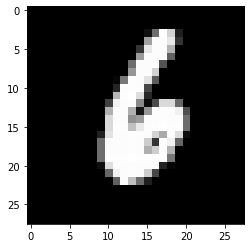

In [39]:
test_prediction(New_NN1,56)

Prediction:  [[2.35748406e-04]
 [2.20492562e-04]
 [2.49129571e-02]
 [3.96072234e-02]
 [1.14552711e-03]
 [5.50714524e-01]
 [5.48692591e-03]
 [5.08854097e-06]
 [3.74436213e-01]
 [3.23529979e-03]]
Label:  5


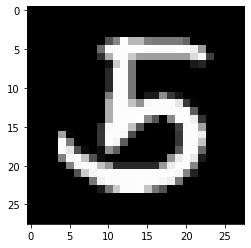

In [40]:
test_prediction(New_NN1,560)

Prediction:  [[1.03088293e-02]
 [1.17815232e-06]
 [1.31869252e-04]
 [2.10936825e-03]
 [8.92434738e-04]
 [9.48199861e-01]
 [2.61370937e-02]
 [6.28808655e-05]
 [7.40236059e-03]
 [4.75412370e-03]]
Label:  5


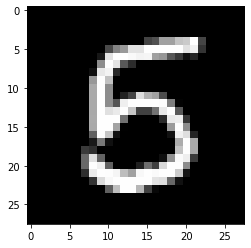

In [41]:
test_prediction(New_NN1,2)

Prediction:  [[2.35379046e-04]
 [6.99195651e-05]
 [7.91902894e-05]
 [4.94203701e-04]
 [1.55797817e-04]
 [8.87189369e-06]
 [2.02017849e-07]
 [9.93868235e-01]
 [1.36870375e-04]
 [4.95133012e-03]]
Label:  7


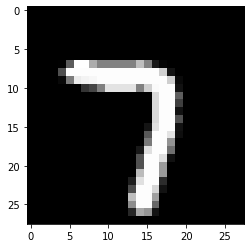

In [42]:
test_prediction(New_NN1,10000)

Prediction:  [[9.91413767e-01]
 [1.04101717e-06]
 [1.50280248e-04]
 [7.31678172e-05]
 [7.26304179e-05]
 [5.16588884e-03]
 [1.87430188e-03]
 [1.09213479e-03]
 [1.04877646e-04]
 [5.19107188e-05]]
Label:  0


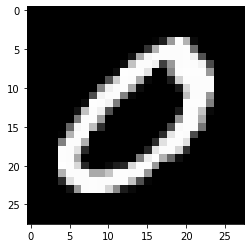

In [43]:
test_prediction(New_NN1,30000)